# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Gabriel Alvarez Arzate

- ID: A01642991

- My carreer: ITC


# Importing libraries

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/Colab Notebooks/TC1002S/"

else:
    # Define path del proyecto
    Ruta            = ""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# Import the packages that we will be using
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from re import S
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [21]:
# Dataset url
url = Ruta + "Evidencia/A01642991_X.csv"

# Load the dataset
df = pd.read_csv(url)

colname="ID"
df=df.rename(columns={df.columns[0]: colname})
df

,ID,x1,x2,x3
0,0,10.061478,2.629552,4.874351
1,1,-5.996264,1.759575,-6.723019
2,2,-7.070886,1.096715,-8.850311
3,3,-11.585922,-8.708936,0.624641
4,4,-1.843270,6.259405,-9.069040
...,...,...,...,...
390,390,-4.819674,9.664598,-6.726170
391,391,-9.960592,6.456359,-6.378800
392,392,-6.265309,8.323515,-7.174006
393,393,-9.603898,-5.522412,-1.803752


## A2 Data managment


Print the first 7 rows

In [22]:
df.head(7)

,ID,x1,x2,x3
0,0,10.061478,2.629552,4.874351
1,1,-5.996264,1.759575,-6.723019
2,2,-7.070886,1.096715,-8.850311
3,3,-11.585922,-8.708936,0.624641
4,4,-1.843270,6.259405,-9.069040
5,5,-6.233837,-8.768009,0.770555
6,6,-6.896567,1.970488,-5.332871


Print the last 4 rows

In [26]:
df.tail(4)

,ID,x1,x2,x3
391,391,-9.960592,6.456359,-6.378800
392,392,-6.265309,8.323515,-7.174006
393,393,-9.603898,-5.522412,-1.803752
394,394,-6.687916,-6.592126,0.861333


How many rows and columns are in your data?

Use the `shape` method


In [28]:
df.shape

(395, 4)

Print the name of all columns

Use the `columns` method

In [29]:
df.columns

Index(['ID', 'x1', 'x2', 'x3'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [30]:
df.dtypes

ID      int64
x1    float64
x2    float64
x3    float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here

# 1)  Tenemos un total de 395 observaciones en total, porque el ID empieza de 0 a 394, entonces significa que el data set se tomaron un total de 395 datos distintos

# 2) Las Variables que hay tienen su propia ID, por esto esta la columana de ID unico para cada valor teniendo un tipo de entero

# 3) Las variables de  x1, x2, son de tipo flotante, esto quiere decir que vamos a estar manejando valores de tipo flotante

Print a statistical summary of your columns


In [32]:
#Stadistical summary of all columns
df.describe()

,ID,x1,x2,x3
count,395.000000,395.000000,395.000000,395.000000
mean,197.000000,-3.577865,1.169571,-1.608340
std,114.170924,6.898425,6.767866,5.274870
min,0.000000,-14.218587,-13.823015,-12.569219
25%,98.500000,-9.003937,-3.643146,-6.233132
50%,197.000000,-5.854333,1.970488,-2.288385
75%,295.500000,1.152872,6.224001,2.623942
max,394.000000,12.907905,13.312479,10.326327


In [ ]:
# 1) What is the minumum and maximum values of each variable
#    The maximun of ID is  394 and the minimun of ID is 0
#    The maximun of x1 is  12.907905 and the minimun of x1 is -14.218587
#    The maximun of x2 is  13.312479 and the minimun of x3 is -13.823015
#    The maximun of x3 is  10.326327 and the minimun of x3 is -12.569219
#
# 2) What is the mean and standar deviation of each variable
#    The standar deviation of ID is 114.170924
#    The standar deviation of x1 is 6.898425
#    The standar deviation of x2 is 6.767866
#    The standar deviation of x3 is 5.274870
#
# 3) What the 25%, 50% and 75% represent?
#    25% This indicates the value below which 25% of the data lies.
#    50% It is the median, it separates the upper and lower half of the data.
#    75% This indicates the value below which 75% of the data lies.

Rename the columns using the same name with capital letters

In [33]:
df=df.rename(columns={"x1":"X1","x2":"X2","x3":"X3"})
df

,ID,X1,X2,X3
0,0,10.061478,2.629552,4.874351
1,1,-5.996264,1.759575,-6.723019
2,2,-7.070886,1.096715,-8.850311
3,3,-11.585922,-8.708936,0.624641
4,4,-1.843270,6.259405,-9.069040
...,...,...,...,...
390,390,-4.819674,9.664598,-6.726170
391,391,-9.960592,6.456359,-6.378800
392,392,-6.265309,8.323515,-7.174006
393,393,-9.603898,-5.522412,-1.803752


Rename the columns to their original names

In [34]:
df=df.rename(columns={"X1":"x1","X2":"x2","X3":"x3"})
df

,ID,x1,x2,x3
0,0,10.061478,2.629552,4.874351
1,1,-5.996264,1.759575,-6.723019
2,2,-7.070886,1.096715,-8.850311
3,3,-11.585922,-8.708936,0.624641
4,4,-1.843270,6.259405,-9.069040
...,...,...,...,...
390,390,-4.819674,9.664598,-6.726170
391,391,-9.960592,6.456359,-6.378800
392,392,-6.265309,8.323515,-7.174006
393,393,-9.603898,-5.522412,-1.803752


Use two different alternatives to get one of the columns

In [37]:
df["x1"]

0      10.061478
1      -5.996264
2      -7.070886
3     -11.585922
4      -1.843270
         ...    
390    -4.819674
391    -9.960592
392    -6.265309
393    -9.603898
394    -6.687916
Name: x1, Length: 395, dtype: float64

In [38]:
df.loc[:, "x2"]

0      2.629552
1      1.759575
2      1.096715
3     -8.708936
4      6.259405
         ...   
390    9.664598
391    6.456359
392    8.323515
393   -5.522412
394   -6.592126
Name: x2, Length: 395, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [40]:
df.loc[62:72,["x1","x2"]]

,x1,x2
62,-2.036734,9.452994
63,7.508406,2.364501
64,-1.614472,10.698994
65,-10.322031,-10.800089
66,-7.859420,4.361678
67,-6.761653,-11.274349
68,-13.447207,-10.041170
69,-8.012816,4.010743
70,-1.838171,9.083661
71,-7.614041,4.011629


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [54]:
#Null and not null of second column
null_x1=df['x1'].isnull().sum()
not_null_x1=df['x1'].notnull().sum()
print("Null values of x1: ", null_x1)
print("Not Null values of x1: ", not_null_x1)

#Null and not null of third column
null_x2=df['x2'].isnull().sum()
not_null_x2=df['x2'].notnull().sum()
print("Null values of x1: ", null_x2)
print("Not Null values of x1: ", not_null_x2)

#With this we can interpret that the daframe
#does not have any empty value for columns 2 and 3,
#since the total of null values in both is 0 while the non-null is equal to the total of data there is.

Null values of x1:  0
Not Null values of x1:  395
Null values of x1:  0
Not Null values of x1:  395


Discard the last column


In [55]:
df.drop("x3", axis=1, inplace = True)
df

,ID,x1,x2
0,0,10.061478,2.629552
1,1,-5.996264,1.759575
2,2,-7.070886,1.096715
3,3,-11.585922,-8.708936
4,4,-1.843270,6.259405
...,...,...,...
390,390,-4.819674,9.664598
391,391,-9.960592,6.456359
392,392,-6.265309,8.323515
393,393,-9.603898,-5.522412


### Questions

Based on the previos results, provide a description of yout dataset

Your response:
The dataset was composed of 4 columns, 1 with a unique ID and another 3 that are the variables within it, but when eliminating the last column, we were left with 3 columns, where ID represents its unique identification of the values, while x1 and x2 They are the different data that are in the file, we do not know what they represent or how we can relate them to something else, what we do know is that they are of floating type and that they do not contain any null value within the dataset, finally we know that there is a total of 395 data for each column since there are that many rows.

## A3 Data visualization

Plot in the same figure the histogram of two variables



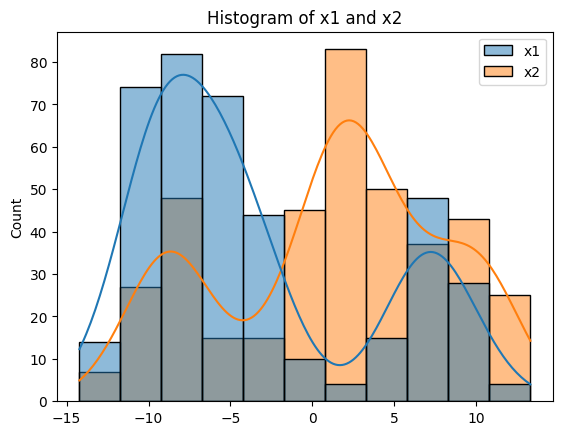

In [58]:
df2plot = df[["x1","x2"]]
sns.histplot(df2plot,kde=True)
plt.title("Histogram of x1 and x2")
plt.show()

Based on these plots, provide a description of your data:

Your response here:

What we can see is that the x1 data is more likely to be smaller, this is because in the histogram we can see that the majority of the x1 data is below 0, with between -10 and -5 being most of the data, while the data of x2 is larger compared to that of x2, since the majority of the data of x2 is between 0 and 5 and is where they have the most occurrences.

Plot in the same figure the boxplot of two variables

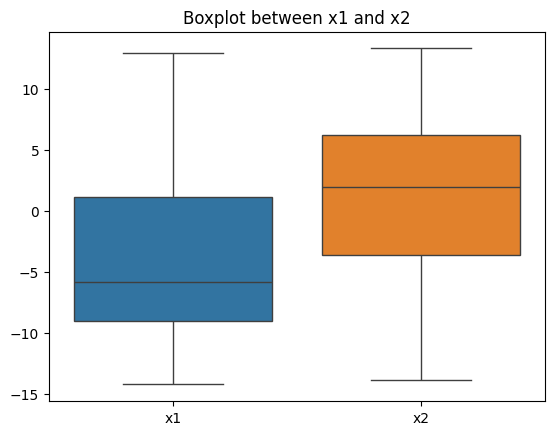

In [70]:
sns.boxplot([df['x1'],df['x2']])
plt.title("Boxplot between x1 and x2")
plt.show()

Plot the scatter plot of two variables

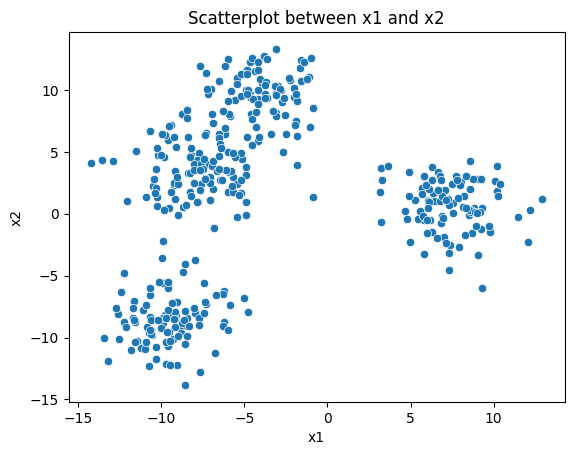

In [78]:
sns.scatterplot(data=df,x="x1",y="x2")
plt.title("Scatterplot between x1 and x2")
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:
For what the bloxplot is, we can observe that the values of x1 are lower than 0, this means that they are smaller than the values of x2, since the values of x2 are found with values larger than the values of x2. , while when analyzing the scatter plot, we can see that three different groups of data are generated, this means that later it will help us identify that we will have 3 different clusters.


## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [81]:
# Define number of clusters
K  = 3
# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

Add to your dataset a column with the estimated cluster to each data point

In [84]:
yestimated = km.fit_predict(df[['x1','x2']])
df['yestimated']=yestimated
df

,ID,x1,x2,yestimated
0,0,10.061478,2.629552,0
1,1,-5.996264,1.759575,1
2,2,-7.070886,1.096715,1
3,3,-11.585922,-8.708936,2
4,4,-1.843270,6.259405,1
...,...,...,...,...
390,390,-4.819674,9.664598,1
391,391,-9.960592,6.456359,1
392,392,-6.265309,8.323515,1
393,393,-9.603898,-5.522412,2


Print the number associated to each cluster

In [85]:
# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]


# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]


# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 2: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 99
Number of points in clusters 1: 197
Number of points in clusters 2: 99
Total Number of points in the clusters: 395


Print the centroids

In [86]:
# Cluster centroides
km.cluster_centers_

array([[ 7.34931131,  0.6543325 ],
       [-6.07324903,  6.32006882],
       [-9.53947768, -8.56415901]])

Print the intertia metric

In [87]:
# Sum of squared error (sse) of the final model
km.inertia_

5598.364929303716

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

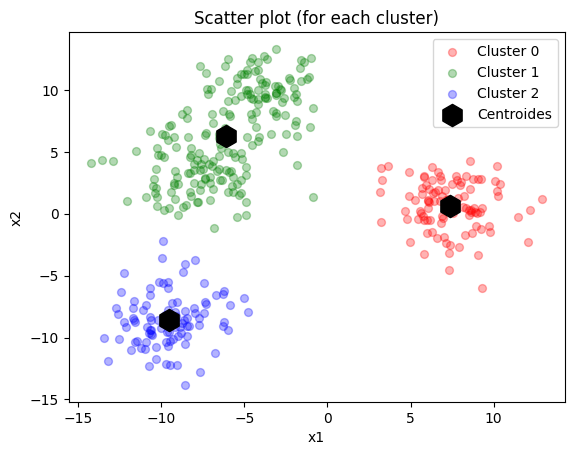

In [94]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='h', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

Lo que podemos observar de nuestro resultado de los distintos cluster es que en total tenemos 3 cluster, los cuales tienen diferentes cantidad de datos y estan en distintos puntos del scatter haciendo que si sean diferentes entre ellos, podemos ver que el cluster con mayor cantidad de valores es el cluster 1, mientras que el cluster 0 y 1 tienen la misma cantidad de valores.

## A5 Elbow plot

Compute the Elbow plot

In [95]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1','x2']])
    # Save sse for each k
    sse.append(km.inertia_)

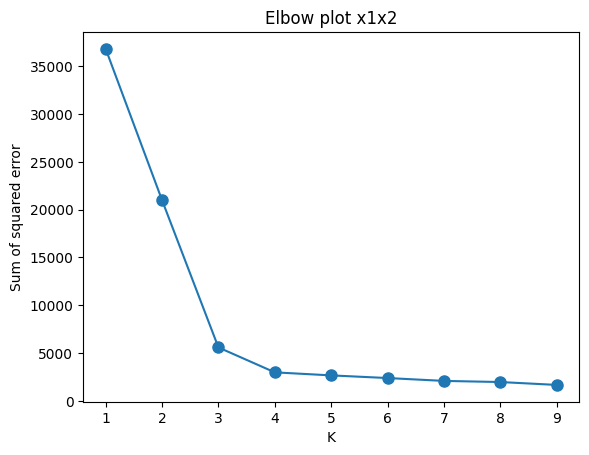

In [96]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot x1x2')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:

There are three clusters, this is because when analyzing what the scatter graph was, we could clearly see how three different groups are formed, that is why we selected that there are three clusters.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:

Yes, since since I analyzed the scatter it seemed that there would be 3.

# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

El desarrollo que tuve en esta semana tec respecto a la interpretacion de variables fue muy grande, ya que en todo en todo momento fuimos aprendiendo y analizando distintos conjuntos de datos e interpretandolos, lo que nos ayudo mucho al momento de hacer esta evidencia, ya que pudimos interpretar de mnaera cercetera cada uno de los distintos valores que se me presentaron.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Mi nivel de desarollo fue muy bueno, ya que aprendimos a construir distintos modelos bivirados, como vienen siendo las disntintas graficas que hicismos en las clases, como los boxplox y luego poder analizarlos para interpretar los resultados y podemos hacer un analisis posible de los posibles clusters que habria a futuro, luego con la creacion de clusters y graficarlos pude identificar como es que se comportaban los datos.